<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></a></span></li></ul></li><li><span><a href="#Откройте-и-изучите-файл" data-toc-modified-id="Откройте-и-изучите-файл-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откройте и изучите файл</a></span></li><li><span><a href="#Разбейте-данные-на-выборки" data-toc-modified-id="Разбейте-данные-на-выборки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Разбейте данные на выборки</a></span></li><li><span><a href="#Исследуйте-модели" data-toc-modified-id="Исследуйте-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследуйте модели</a></span></li><li><span><a href="#Проверьте-модель-на-тестовой-выборке" data-toc-modified-id="Проверьте-модель-на-тестовой-выборке-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверьте модель на тестовой выборке</a></span></li><li><span><a href="#(бонус)-Проверьте-модели-на-адекватность" data-toc-modified-id="(бонус)-Проверьте-модели-на-адекватность-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>(бонус) Проверьте модели на адекватность</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [ ]:
import pandas as pd
import numpy as np
# df split
from sklearn.model_selection import train_test_split
# binary models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# sanity check
from sklearn.metrics import accuracy_score
#from sklearn.metrics import recall_score
#from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
# progress bar
from tqdm import tqdm
# test and improve models
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# plot
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [ ]:
# for google colab:
from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv('gdrive/My Drive/Colab Notebooks/6-phone-plans-recomendation/data/users_behavior.csv')#, sep='\t')

# for yandex jupiter:
#df = pd.read_csv('/datasets/users_behavior.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Описание столбцов датасета:
- `сalls` — количество звонков,
- `minutes` — суммарная длительность звонков в минутах,
- `messages` — количество sms-сообщений,
- `mb_used` — израсходованный интернет-трафик в Мб,
- `is_ultra` — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

In [ ]:
df.head(5)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [ ]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [ ]:
df.duplicated().sum()

0

Данные в столбцах `calls` и `messages` преобразую к целочисленному формату

In [ ]:
df['calls'] = df['calls'].astype('int')
df['messages'] = df['messages'].astype('int')

ВЫВОД Пропусков в столбцах нет, дубликатов нет, данные в столбцах `calls` и `messages` преобразую к целочисленному формату

## Разбейте данные на выборки

In [ ]:
features = df.drop('is_ultra', axis=1)
target = df['is_ultra'] 

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.20, random_state=12345)

features_train, features_test, target_train, target_test = train_test_split(
    features_train, target_train, test_size=0.25, random_state=12345)

In [ ]:
print(features_train.shape, features_valid.shape, features_test.shape)
print(target_train.shape, target_valid.shape, target_test.shape)

(1928, 4) (643, 4) (643, 4)
(1928,) (643,) (643,)


ВЫВОД датасет разделен на тренировочную, валидационную и тестовую выборки в соотношении 3:1:1, целевой признак также разделен

## Исследуйте модели

Так как исследуемый признак бинарный, то исследую 3 модели классификации

Логистическая регрессия

In [ ]:
model_logistic = LogisticRegression(random_state=12345).fit(features_train, target_train)
prediction_logistic = model_logistic.predict(features_valid)

Решающее дерево

In [ ]:
best_deph = 0
best_accuracy_tree = 0
for depth in tqdm(range (1, 100)):
  model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
  model_tree.fit(features_train, target_train)
  prediction_tree = model_tree.predict(features_valid)
  accuracy = accuracy_score(target_valid, prediction_tree)
  if best_accuracy_tree < accuracy:
    best_accuracy_tree = accuracy
    best_deph = depth

100%|██████████| 99/99 [00:01<00:00, 64.56it/s]


Случайный лес

In [ ]:
best_est = 0
best_accuracy_forest = 0
for est in tqdm(range(1, 100)):
  model_forest = RandomForestClassifier(random_state=12345, n_estimators=est) 
  model_forest.fit(features_train, target_train)
  prediction_forest = model_forest.predict(features_valid)
  accuracy = accuracy_score(target_valid, prediction_forest)
  if best_accuracy_forest < accuracy:
    best_accuracy_forest = accuracy
    best_est = est

100%|██████████| 99/99 [00:26<00:00,  3.77it/s]


Метрики качества

Создаю еще раз модели, но уже с лучшими параметрами

Создание и обучение

In [ ]:
model_tree = RandomForestClassifier(random_state=12345, max_depth=best_deph).fit(features_train, target_train)
model_forest = RandomForestClassifier(random_state=12345, n_estimators=best_est).fit(features_train, target_train)

Предсказание моделей по валидационной выборке

In [ ]:
prediction_tree = model_tree.predict(features_valid)
prediction_forest = model_forest.predict(features_valid)
prediction_logistic = model_logistic.predict(features_valid)

Метрики качества:
- доля правильных ответов (accuracy) отношение числа правильных ответов к размеру тестовой выборки
- точность (precision) показывает, какая доля объектов, для которых
модель предсказала ответ «1», действительно имеют ответ «1»
- полнота (recall) показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.
 - Recall демонстрирует способность алгоритма обнаруживать данный класс вообще, а precision — способность отличать этот класс от других классов.
- F-оценка является мерой точности теста. Он рассчитывается из точности и отзыва теста, где точность - это количество правильно идентифицированных положительных результатов, деленное на количество всех положительных результатов, включая те, которые определены неправильно, а отзыв - это количество правильно идентифицированных положительных результатов, деленное на количество всех образцов, которые должны были быть идентифицированы как положительные. Оценка F1- это среднее гармоническое точности и запоминания


In [ ]:
sanity_logistic = pd.DataFrame(
    classification_report(
        target_valid,
        prediction_logistic,
        target_names=['non-ultra', 'ultra'],
        output_dict=True)
    )
sanity_logistic['model_type'] = 'logistic'

In [ ]:
sanity_tree = pd.DataFrame(
    classification_report(
        target_valid,
        prediction_tree,
        target_names=['non-ultra', 'ultra'],
        output_dict=True)
    )
sanity_tree['model_type'] = 'tree'

In [ ]:
sanity_forest = pd.DataFrame(
    classification_report(
        target_valid,
        prediction_forest,
        target_names=['non-ultra', 'ultra'],
        output_dict=True)
    )
sanity_forest['model_type'] = 'forest'

In [ ]:
sanity_valid = sanity_logistic.append(sanity_tree).append(sanity_forest)
sanity_valid

,non-ultra,ultra,accuracy,macro avg,weighted avg,model_type
precision,0.747458,0.886792,0.758942,0.817125,0.789930,logistic
recall,0.986577,0.239796,0.758942,0.613187,0.758942,logistic
f1-score,0.850530,0.377510,0.758942,0.614020,0.706344,logistic
support,447.000000,196.000000,0.758942,643.000000,643.000000,logistic
precision,0.800384,0.754098,0.791602,0.777241,0.786275,tree
recall,0.932886,0.469388,0.791602,0.701137,0.791602,tree
f1-score,0.861570,0.578616,0.791602,0.720093,0.775320,tree
support,447.000000,196.000000,0.791602,643.000000,643.000000,tree
precision,0.817814,0.711409,0.793157,0.764612,0.785379,forest
recall,0.903803,0.540816,0.793157,0.722310,0.793157,forest


In [ ]:
df_f_score = sanity_valid[sanity_valid.index == 'f1-score'][{'accuracy', 'macro avg', 'model_type'}]

In [ ]:
fig = make_subplots(rows=1, cols=2)#, shared_yaxes=True)

fig.add_trace(go.Bar(x=df_f_score['model_type'],
                     y=df_f_score['accuracy'],
                     name='accuracy',),
              1, 1)
fig.add_trace(go.Bar(x=df_f_score['model_type'],
                     y=df_f_score['macro avg'],
                     name='f1-score',),
              1, 2)
fig.update_layout(title_text="Accuracy и F1-Score по тестовой выборке",
                  height=500,
                  width=800)
fig.show()

ВЫВОД Accuracy и F-оценка выше всего у модели случайного леса

## Проверьте модель на тестовой выборке

Предсказания моделей по тестовой выборке

In [ ]:
prediction_tree_test = model_tree.predict(features_test)
prediction_forest_test = model_forest.predict(features_test)
prediction_logistic_test = model_logistic.predict(features_test)

Получение метрик по тестовой выборке

In [ ]:
sanity_logistic_test = pd.DataFrame(
    classification_report(
        target_test,
        prediction_logistic_test,
        target_names=['non-ultra', 'ultra'],
        output_dict=True)
    )
sanity_logistic_test['model_type'] = 'logistic_test'

In [ ]:
sanity_tree_test = pd.DataFrame(
    classification_report(
        target_test,
        prediction_tree_test,
        target_names=['non-ultra', 'ultra'],
        output_dict=True)
    )
sanity_tree_test['model_type'] = 'tree_test'

In [ ]:
sanity_forest_test = pd.DataFrame(
    classification_report(
        target_test,
        prediction_forest_test,
        target_names=['non-ultra', 'ultra'],
        output_dict=True)
    )
sanity_forest_test['model_type'] = 'forest_test'

In [ ]:
sanity_test = sanity_logistic_test.append(sanity_tree_test).append(sanity_forest_test)
sanity_test

,non-ultra,ultra,accuracy,macro avg,weighted avg,model_type
precision,0.725126,0.740000,0.726283,0.732563,0.729753,logistic_test
recall,0.970655,0.185000,0.726283,0.577827,0.726283,logistic_test
f1-score,0.830116,0.296000,0.726283,0.563058,0.663983,logistic_test
support,443.000000,200.000000,0.726283,643.000000,643.000000,logistic_test
precision,0.781308,0.768519,0.779160,0.774913,0.777330,tree_test
recall,0.943567,0.415000,0.779160,0.679283,0.779160,tree_test
f1-score,0.854806,0.538961,0.779160,0.696883,0.756565,tree_test
support,443.000000,200.000000,0.779160,643.000000,643.000000,tree_test
precision,0.816162,0.736486,0.797823,0.776324,0.791379,forest_test
recall,0.911964,0.545000,0.797823,0.728482,0.797823,forest_test


In [ ]:
df_f_score_test = sanity_test[sanity_test.index == 'f1-score'][{'accuracy', 'macro avg', 'model_type'}]

In [ ]:
fig = make_subplots(rows=1, cols=2)#, shared_yaxes=True)

fig.add_trace(go.Bar(x=df_f_score_test['model_type'],
                     y=df_f_score_test['accuracy'],
                     name='accuracy',),
              1, 1)
fig.add_trace(go.Bar(x=df_f_score_test['model_type'],
                     y=df_f_score_test['macro avg'],
                     name='f1-score',),
              1, 2)
fig.update_layout(title_text="Accuracy и F1-Score по тестовой выборке",
                  height=500,
                  width=800)
fig.show()

ВЫВОД лучшая модель из исследуемых - модель случайного леса

## (бонус) Проверьте модели на адекватность

Улучшение модели случайного леса

Объявляю и обучаю модель DummyClassifier

In [ ]:
dummy_clf = DummyClassifier(random_state=12345)
dummy_clf.fit(features_train, target_train)

DummyClassifier(random_state=12345)

Сравниваю с первоначальной моделью случайного леса на валидационной выборке

In [ ]:
sanity_dummy_clf = pd.DataFrame(
    classification_report(
        target_valid,
        dummy_clf.predict(features_valid),
        target_names=['non-ultra', 'ultra'],
        output_dict=True)
    )
sanity_dummy_clf['model_type'] = 'dummy_clf'

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
sanity_dummy_clf = sanity_forest.append(sanity_dummy_clf)

df_f_score_dummy = sanity_dummy_clf[sanity_dummy_clf.index == 'f1-score'][{'accuracy', 'macro avg', 'model_type'}]

In [ ]:
fig = make_subplots(rows=1, cols=2)#, shared_yaxes=True)

fig.add_trace(go.Bar(x=df_f_score_dummy['model_type'],
                     y=df_f_score_dummy['accuracy'],
                     name='accuracy'),
              1, 1)
fig.add_trace(go.Bar(x=df_f_score_dummy['model_type'],
                     y=df_f_score_dummy['macro avg'],
                     name='f1-score'),
              1, 2)
fig.update_layout(title_text="Accuracy и F1-Score по валидационной выборке",
                  height=500,
                  width=800)
fig.show()

Сравниваю с первоначальной моделью случайного леса на тестовой выборке DummyClassifier

In [ ]:
sanity_dummy_clf_test = pd.DataFrame(
    classification_report(
        target_test,
        dummy_clf.predict(features_test),
        target_names=['non-ultra', 'ultra'],
        output_dict=True)
    )
sanity_dummy_clf_test['model_type'] = 'dummy_clf_test'

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
sanity_dummy_clf_test = sanity_forest_test.append(sanity_dummy_clf_test)

df_f_score_dummy_test = sanity_dummy_clf_test[sanity_dummy_clf_test.index == 'f1-score'][{'accuracy', 'macro avg', 'model_type'}]

In [ ]:
fig = make_subplots(rows=1, cols=2)#, shared_yaxes=True)

fig.add_trace(go.Bar(x=df_f_score_dummy_test['model_type'],
                     y=df_f_score_dummy_test['accuracy'],
                     name='accuracy'),
              1, 1)
fig.add_trace(go.Bar(x=df_f_score_dummy_test['model_type'],
                     y=df_f_score_dummy_test['macro avg'],
                     name='f1-score'),
              1, 2)
fig.update_layout(title_text="Accuracy и F1-Score по тестовой выборке",
                  height=500,
                  width=800)
fig.show()

ВЫВОД модель случайного леса предсказывает значительно лучше модели DummyClassifier

Начать можно с алгоритма RandomizedSearchCV, который позволяет исследовать  диапазоны значений параметром модели. По каждому параметру создаю список значений
- n_estimators — число «деревьев» в «случайном лесу».
- max_features — число признаков для выбора расщепления.
- max_depth — максимальная глубина деревьев.
- min_samples_split — минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться.
- min_samples_leaf — минимальное число объектов в листьях.
- bootstrap — использование для построения деревьев подвыборки с возвращением.
При значениях параметров n_iter = 1000 и cv = 2, создается 2000 RF-моделей, случайно выбирая комбинации представленных выше гиперпараметров. В best_params_ сведения о наборе параметров, позволяющем создать самую лучшую модель.

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 200, num = 20)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 20)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 20)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(RandomForestClassifier(random_state=12345), 
                        param_dist, 
                        n_iter = 1000, 
                        cv = 2,
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)

rs.fit(features_train, target_train)
rs.best_params_

Fitting 2 folds for each of 1000 candidates, totalling 2000 fits


{'bootstrap': False,
 'max_depth': 19,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 39,
 'n_estimators': 42}

Проверяю значение accuracy и других метрик у модели с наилучшими параметрами в сравнении с первоначальнйо лучшей моделью

- строю модель

In [ ]:
model_forest_best_rs = RandomForestClassifier(random_state=12345,
                                      n_estimators=42,
                                      bootstrap=False,
                                      max_depth=19,
                                      min_samples_split=39,
                                      min_samples_leaf=4,
                                      max_features = 'log2').fit(features_train, target_train)

- получаю метрики

In [ ]:
sanity_forest_rs_best = pd.DataFrame(
    classification_report(
        target_valid,
        model_forest_best_rs.predict(features_valid),
        target_names=['non-ultra', 'ultra'],
        output_dict=True)
    )
sanity_forest_rs_best['model_type'] = 'forest_rs_best'

In [ ]:
sanity_valid_after_rs = sanity_forest.append(sanity_forest_rs_best)

In [ ]:
df_f_score_test_after_rs = sanity_valid_after_rs[sanity_valid_after_rs.index == 'f1-score'][{'accuracy', 'macro avg', 'model_type'}]

- строю график

In [ ]:
fig = make_subplots(rows=1, cols=2)#, shared_yaxes=True)

fig.add_trace(go.Bar(x=df_f_score_test_after_rs['model_type'],
                     y=df_f_score_test_after_rs['accuracy'],
                     name='accuracy',),
              1, 1)
fig.add_trace(go.Bar(x=df_f_score_test_after_rs['model_type'],
                     y=df_f_score_test_after_rs['macro avg'],
                     name='f1-score',),
              1, 2)
fig.update_layout(title_text="Accuracy и F1-Score по валидационной выборке",
                  height=500,
                  width=800)
fig.show()

ВЫВОД По сравнению с предыдущей моделью, показатели не улучшились, попробую на основании собранных данных улучшить

Создаю выборку значений по метрикам рандомных моделей, сортирую по наилучшим результатам

In [ ]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            #'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(5)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,42,39,4,log2,19,False,0.824689,1
1,137,42,7,log2,14,False,0.824689,1
2,105,47,7,sqrt,8,False,0.823133,3
3,137,50,7,sqrt,11,False,0.822614,4
4,95,42,7,log2,9,False,0.822614,4


Создаю графики, чтобы понять какие параметры лучше всего себя показывают

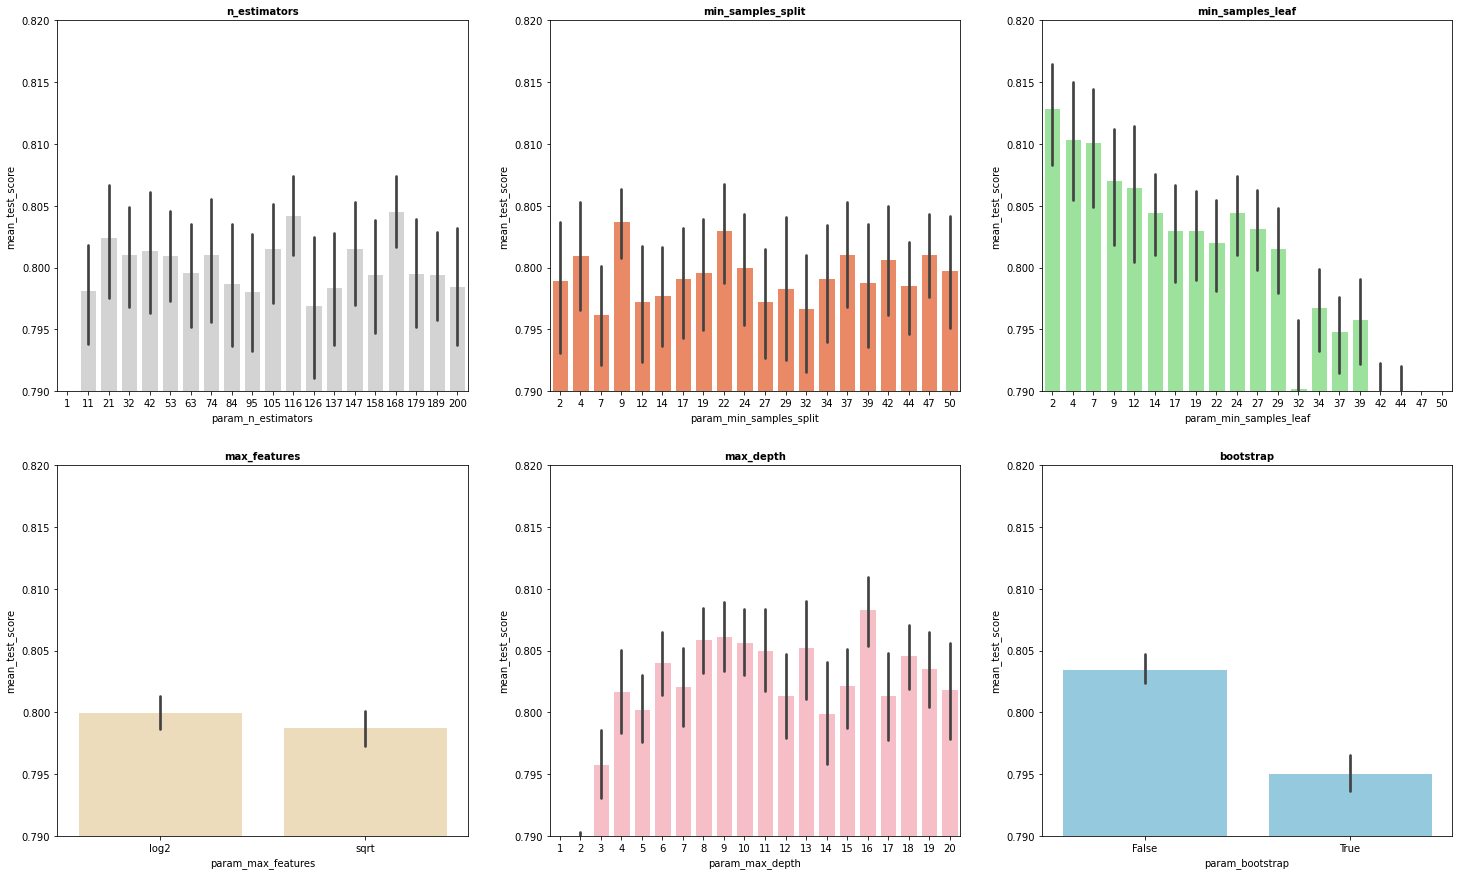

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True)#, font_scale = 10)
fig.set_size_inches(25,15)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.79,.82])
axs[0,0].set_title(label = 'n_estimators', size=10, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.79,.82])
axs[0,1].set_title(label = 'min_samples_split', size=10, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.79,.82])
axs[0,2].set_title(label = 'min_samples_leaf', size=10, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.79,.82])
axs[1,0].set_title(label = 'max_features', size=10, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.79,.82])
axs[1,1].set_title(label = 'max_depth', size=10, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.79,.82])
axs[1,2].set_title(label = 'bootstrap', size=10, weight='bold')
plt.show()

Анализ параметров:
- n_estimators: значения 116, 168, 21, 105, 147 показывают наилучшие средние результаты
- min_samples_split: 2, 9, 22, 4,37, 42, 47, 24
- min_samples_leaf: 2, 4, 7, 9, 12
- max_features: вариант log2 даёт самый высокий средний результат
- max_depth: 8, 9, 10, 11, 13, 16
- bootstrap: значение False показывает наилучший средний результат

После применения алгоритма RandomizedSearchCV воспользуюсь алгоритмом GridSearchCV для проведения более точного поиска наилучшей комбинации гиперпараметров. Здесь исследуются те же гиперпараметры, но при использовании алгоритма GridSearchCV исследуется каждая комбинация гиперпараметров.

Так как поиск по случайным параметрам не выявил модель с метриками лучше первоначальной, то добавляю ее данные для поиска лучшего варианта модели

In [ ]:
model_forest.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(n_estimators=84, random_state=12345)>

n_estimators=84, остальные параметры по умолчанию (auto, None, 2, 1, True)

In [ ]:
n_estimators = [116, 168, 21, 105, 147, 84]
max_features = ['auto']
max_depth = [8, 9, 10, 11, 13, 16, None]
min_samples_split = [2, 9, 22, 4,37, 42, 47, 24]
min_samples_leaf = [2, 4, 7, 9, 12, 1]
bootstrap = [False, True]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(RandomForestClassifier(random_state=12345),
                  param_grid,
                  cv = 2,
                  verbose = 1,
                  n_jobs=-1)
gs.fit(features_train, target_train)
rfc_3 = gs.best_estimator_
gs.best_params_

Fitting 2 folds for each of 4032 candidates, totalling 8064 fits


{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 7,
 'min_samples_split': 47,
 'n_estimators': 105}

Отобраны параметры для самой лучшей модели из проанализированных

Создаю выборку по результатам анализа, чтобы посмотреть, на каком месте первоначальная модель по всем суммарным метрикам

In [ ]:
gs_df = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
gs_df = gs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            #'split2_test_score', 
            'std_test_score'],
            axis=1)
gs_df = gs_df.drop_duplicates()

Делаю фильтр по параметрам первоначальной модели

In [ ]:
df_first_model_forest = gs_df.query('param_n_estimators == 84 & param_min_samples_split == 2 & param_min_samples_leaf == 1 & param_bootstrap == True')
df_first_model_forest = df_first_model_forest[df_first_model_forest['param_max_depth'].isna()]

И сравниваю ее с моделью на 1 месте рейтинга

In [ ]:
gs_df_best = gs_df[gs_df.index == 0]
gs_df_best.append(df_first_model_forest)

,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_test_score,rank_test_score
0,False,10,auto,7,47,105,0.825726,1
3288,True,None,auto,1,2,84,0.812241,3180


Строю модель по самым лучшим найденным показателям

In [ ]:
model_forest_best_gs = RandomForestClassifier(random_state=12345,
                                      n_estimators=84,
                                      bootstrap=False,
                                      max_depth=10,
                                      min_samples_split=47,
                                      min_samples_leaf=4).fit(features_train, target_train)

Получаю метрики

In [ ]:
sanity_forest_gs_best = pd.DataFrame(
    classification_report(
        target_valid,
        model_forest_best_gs.predict(features_valid),
        target_names=['non-ultra', 'ultra'],
        output_dict=True)
    )
sanity_forest_gs_best['model_type'] = 'forest_gs_best'

In [ ]:
sanity_valid_after_gs = sanity_forest.append(sanity_forest_gs_best)

In [ ]:
df_f_score_test_after_gs = sanity_valid_after_gs[sanity_valid_after_gs.index == 'f1-score'][{'accuracy', 'macro avg', 'model_type'}]

Строю график сравнения

In [ ]:
fig = make_subplots(rows=1, cols=2)#, shared_yaxes=True)

fig.add_trace(go.Bar(x=df_f_score_test_after_gs['model_type'],
                     y=df_f_score_test_after_gs['accuracy'],
                     name='accuracy'),
              1, 1)
fig.add_trace(go.Bar(x=df_f_score_test_after_gs['model_type'],
                     y=df_f_score_test_after_gs['macro avg'],
                     name='f1-score'),
              1, 2)
fig.update_layout(title_text="Accuracy и F1-Score по валидационной выборке",
                  height=500,
                  width=800)
fig.show()

Сравнение метрик моделей по тестовой выборке

In [ ]:
sanity_forest_gs_best_test = pd.DataFrame(
    classification_report(
        target_test,
        model_forest_best_gs.predict(features_test),
        target_names=['non-ultra', 'ultra'],
        output_dict=True)
    )
sanity_forest_gs_best_test['model_type'] = 'forest_gs_best_test'

In [ ]:
sanity_valid_after_gs_test = sanity_forest_test.append(sanity_forest_gs_best_test)

In [ ]:
df_f_score_test_after_gs_test = sanity_valid_after_gs_test[sanity_valid_after_gs_test.index == 'f1-score'][{'accuracy', 'macro avg', 'model_type'}]

In [ ]:
fig = make_subplots(rows=1, cols=2)#, shared_yaxes=True)

fig.add_trace(go.Bar(x=df_f_score_test_after_gs_test['model_type'],
                     y=df_f_score_test_after_gs_test['accuracy'],
                     name='accuracy'),
              1, 1)
fig.add_trace(go.Bar(x=df_f_score_test_after_gs_test['model_type'],
                     y=df_f_score_test_after_gs_test['macro avg'],
                     name='f1-score'),
              1, 2)
fig.update_layout(title_text="Accuracy и F1-Score по тестовой выборке",
                  height=500,
                  width=800)
fig.show()

ИТОГОВЫЙ ВЫВОД наилучшие метрики accuracy (доля правильных ответов), precision (точность) и recall (полнота) у модели случайного леса с числом деревьев 84 и остальными параметрами по умолчанию